# 1) AED 1 

### 1) Carga de datos

In [1]:
import pandas as pd

data = pd.read_csv("../data/customer_dataset.csv", sep=",")

data

,orderAmount,orderState,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionAmount,transactionFailed,fraudulent,emailProvider,emailDomain,customerIPAddressSimplified,sameCity
0,18.0,pending,True,card,JCB 16 digit,Citizens First Banks,18,False,False,yahoo,com,only_letters,yes
1,26.0,fulfilled,True,bitcoin,VISA 16 digit,Solace Banks,26,False,True,yahoo,com,only_letters,no
2,45.0,fulfilled,False,card,VISA 16 digit,Vertex Bancorp,45,False,False,yahoo,com,digits_and_letters,no
3,23.0,fulfilled,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.,23,False,False,yahoo,com,digits_and_letters,no
4,43.0,fulfilled,False,card,Mastercard,Vertex Bancorp,43,True,True,other,com,only_letters,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,NaN,NaN,NaN,NaN,NaN,NaN,25,True,NaN,weird,weird,only_letters,unknown
619,NaN,NaN,NaN,NaN,NaN,NaN,25,True,NaN,weird,weird,only_letters,unknown
620,NaN,NaN,NaN,NaN,NaN,NaN,25,False,NaN,weird,weird,only_letters,unknown
621,NaN,NaN,NaN,NaN,NaN,NaN,19,False,NaN,weird,weird,only_letters,unknown


In [2]:
from funpymodeling import status

status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderAmount,145,0.232745,0,0.000000,67,float64
1,orderState,145,0.232745,0,0.000000,3,object
2,paymentMethodRegistrationFailure,281,0.451043,302,0.484751,2,object
3,paymentMethodType,281,0.451043,0,0.000000,4,object
4,paymentMethodProvider,281,0.451043,0,0.000000,10,object
5,paymentMethodIssuer,281,0.451043,0,0.000000,20,object
6,transactionAmount,0,0.000000,0,0.000000,67,int64
7,transactionFailed,0,0.000000,455,0.730337,2,bool
8,fraudulent,455,0.730337,107,0.171750,2,object
9,emailProvider,0,0.000000,0,0.000000,5,object


### 4) Análisis de la variable "paymentMethodType" (categórica)

Visualizamos la variable gráficamente a través de SEABORN:

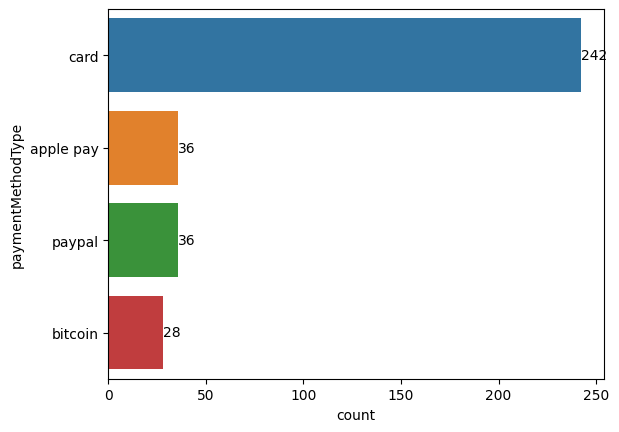

In [3]:
import seaborn as sns

ax = sns.countplot(y=data['paymentMethodType'], order=data['paymentMethodType'].value_counts().index)

# el for sirve para colocar la cantidad en cada contenedor (barra)
for label in ax.containers:
    ax.bar_label(label)


Visualizamos la variable 'paymentMethodType' a traves de la funcion 'freq_tbl' de funpymodeling. 
Que nos permite conocer la cantidad de veces que aparece una categoria *(frequency)*, el porcentaje que representa en esa categoria *(percentage)* y el porcentaje acumulado respecto de las variables listadas *(cumulative_perc)*



In [4]:
from funpymodeling import freq_tbl

freq_tbl(data['paymentMethodType'])

,paymentMethodType,frequency,percentage,cumulative_perc
0,card,242,0.388443,0.707602
1,apple pay,36,0.057785,0.812865
2,paypal,36,0.057785,0.918129
3,bitcoin,28,0.044944,1.000000


Análsis a través de una Query:

In [5]:
#Guardamos la variable a analizar 
metodo_pago = freq_tbl(data['paymentMethodType'])

#_De la siguiente forma podemos solicitar que de la columna 'paymentMethodType' nos traiga todos los elementos
# que sean menores o iguales a 30.
metodo_pago.query("frequency<=30")


,paymentMethodType,frequency,percentage,cumulative_perc
3,bitcoin,28,0.044944,1.0


In [6]:
#_Pero con esta otra sentencia indicamos que solo nos traiga la columna específica que cumpla con la condición.
# (filtramos aun mas la consulta), ingorando la información extra que pueda proporcionarnos (prefiero la anterior)
metodo_pago.query("frequency<=30")['paymentMethodType']

3    bitcoin
Name: paymentMethodType, dtype: object

# 2) AED 2

### 1) Análisis de variables categóricas. Variable objetivo: fraudulent

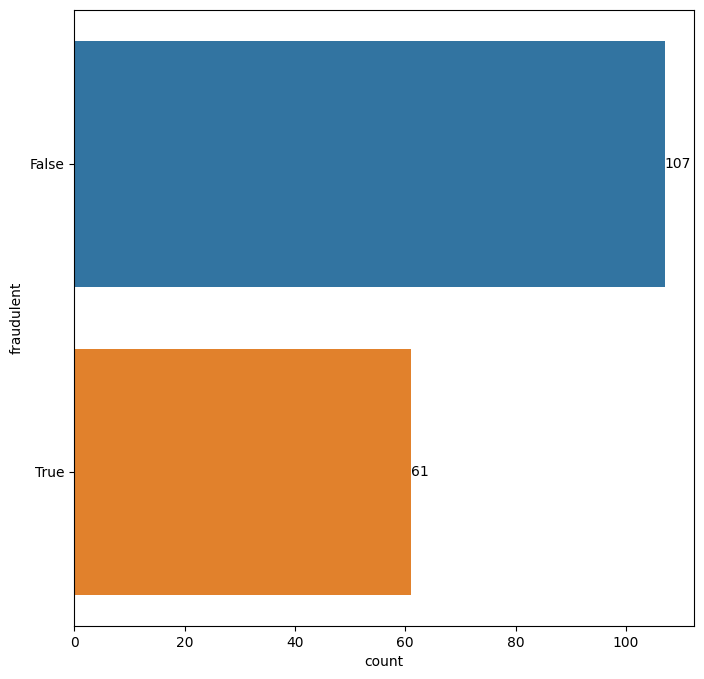

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
aux_fraudulent = sns.countplot(y=data['fraudulent'], order=data['fraudulent'].value_counts().index)

# el for sirve para colocar la cantidad en cada contenedor (barra)
for label in aux_fraudulent.containers:
    aux_fraudulent.bar_label(label)

plt.show()

Total de casos *(fraudulentos y no fraudulentos)*:

In [8]:
freq_tbl(data['fraudulent'])

,fraudulent,frequency,percentage,cumulative_perc
0,False,107,0.171750,0.636905
1,True,61,0.097913,1.000000


### 2) Análsis bivariado

## 2.A) Categórica vs categórica

Utilizamos el método 'crosstab' provisto por pandas:

In [9]:
pd.crosstab(data['fraudulent'], data['transactionFailed'], margins=True)

transactionFailed,False,True,All
fraudulent,,,
False,73,34,107
True,44,17,61
All,117,51,168


*_*Nota:*_ La interpretación de la tabla es la siguiente: Eje X -> transaction failed; Eje Y -> fraudulent.
Decimos entonces que 73 transacciones que fallaron NO son fraudulentas, mientras que 34 transacciones que fallaron SI son fraudulentas.
Tambíen decimos que 44 transacciones que NO fallaron SI eran fraudulentas y 17 transacciones que fallaron NO eran fraudulentas.

In [10]:
pd.crosstab(data.fraudulent, data.transactionFailed, normalize='index', margins=True)

transactionFailed,False,True
fraudulent,,
False,0.682243,0.317757
True,0.721311,0.278689
All,0.696429,0.303571


* **NOTA**: 'crosstab' cuenta con un parametro llamado 'normalize='index'' que presenta la tabla en porcentajes. 

## 2.B) Numérica vs categórica

Para analizar dos variables, una categórica VS una numérica lo que debemos hacer es agrupar por categoria (groupby('var_categorica')) y establecer el promedio (puede ser otro parámetro) para la variable numérica (en este caso 'transactionAmount')

In [11]:
data.groupby('fraudulent')['transactionAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
fraudulent,,,,,,,,
False,107.0,33.373832,16.519584,10.0,20.5,33.0,44.5,75.0
True,61.0,30.950820,14.548111,10.0,19.0,29.0,42.0,69.0


* **Nota**: Decimos entonces que el monto promedio entre transacciones fraudulentas y no-fraudulentas no varía significativamente aunque suelen ser un poco mas bajas las fraudulentas.

Si queremos ver únicamente el promedio de una categoría en concreto (agrupada por sus elementos):


In [12]:
data.groupby('fraudulent')['transactionAmount'].mean()

fraudulent
False    33.373832
True     30.950820
Name: transactionAmount, dtype: float64

## 2.C) Numérica vs Numérica

In [13]:
data.groupby('orderAmount')['transactionAmount'].mean()

orderAmount
10.0     49.875000
11.0     37.466667
12.0     37.571429
13.0     30.500000
14.0     35.857143
           ...    
72.0     43.250000
73.0     22.500000
74.0     35.250000
75.0     33.000000
353.0    10.000000
Name: transactionAmount, Length: 67, dtype: float64

Promedio de todas las variables por la variable a predecir:

In [14]:
data.groupby('transactionAmount').mean(numeric_only=True)

,orderAmount,transactionFailed
transactionAmount,,
10,67.300000,0.272727
11,36.500000,0.300000
12,33.071429,0.391304
13,44.000000,0.000000
14,35.000000,0.458333
...,...,...
72,30.200000,0.400000
73,42.000000,0.000000
74,29.250000,0.250000


# 3) Gráficos en AED

## 3.A) Numérica vs categórica

<Axes: xlabel='transactionFailed', ylabel='transactionAmount'>

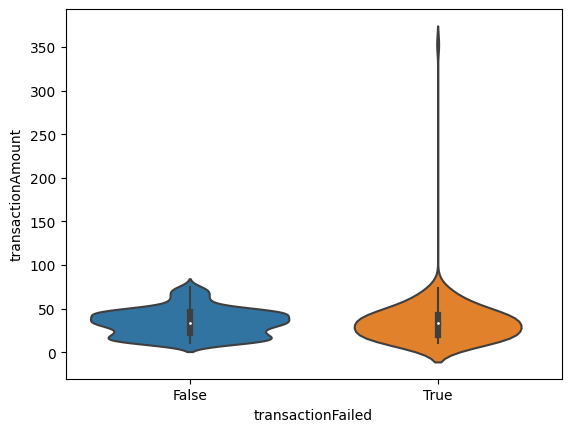

In [15]:
import seaborn as sns

sns.violinplot(y='transactionAmount', x='transactionFailed', data=data)

<Axes: xlabel='transactionFailed', ylabel='transactionAmount'>

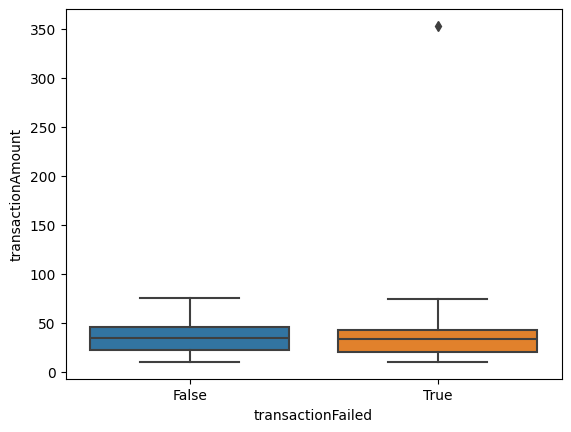

In [16]:
sns.boxplot(y='transactionAmount', x='transactionFailed', data=data)

* **Respuesta 3.A)**: Con el gráfico anterior podemos observar un valor anómalo o muy alto respecto del conjunto de valores graficados en los TRUE. Vamos a recurir a un histograma de la variable 'transactionAmount' para verificar que se trata de un outlier.

c:\Users\Dave\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Monto por transacción')

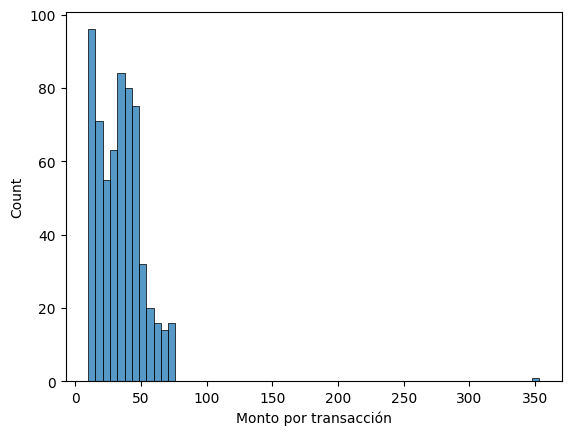

In [17]:
g = sns.histplot(data = data, x = 'transactionAmount')

g.set_xlabel('Monto por transacción')

Observamos en el gráfico anterior que tenemos un valor rondando los 350. Mediante el método 'max()' obtenemos el valor máximo de la variable y verificamos que coincida con el valor que informa el histograma:

In [18]:
print("Valor maximo de la variable 'transactionAmount'", 
      data['transactionAmount'].max())

Valor maximo de la variable 'transactionAmount' 353


## 3.B) Categórica VS Categórica

Se divide en tres gráficos. Cada uno pertenece a una categoría (pendiente/completo/falló) y en cada uno veremos las categorías asociadas con el método de pago.

Cabe mencionar que las variables categóricas as que hemos comparado son: 'paymentMethodType' y 'orderState'.

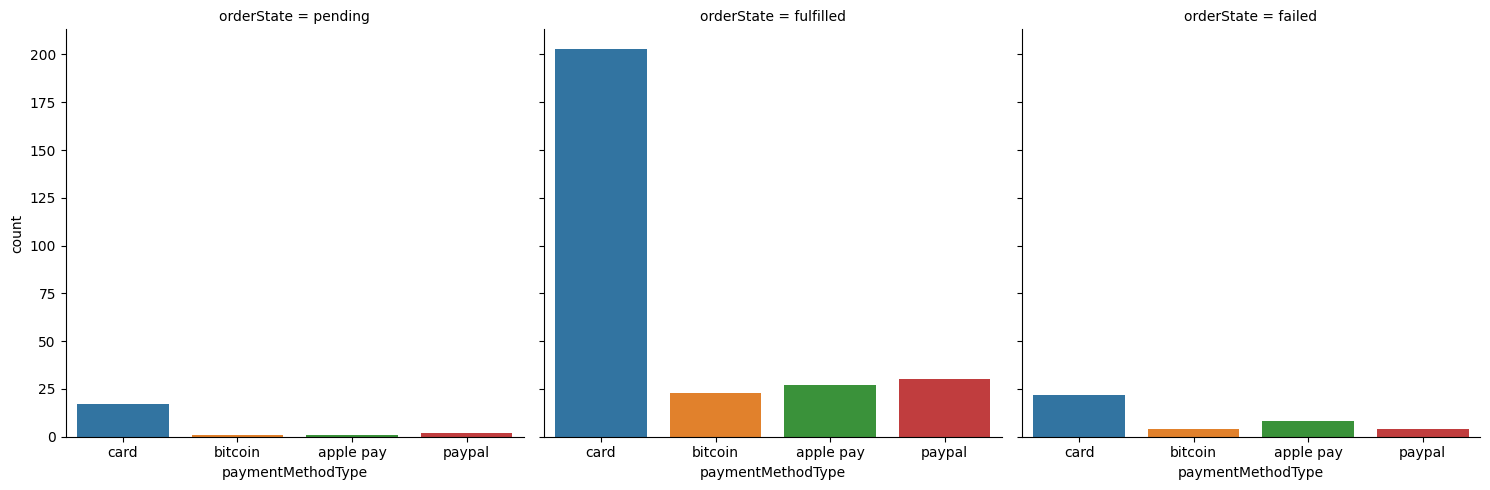

In [19]:
sns.catplot(x="paymentMethodType",
            col="orderState",
            data=data,
            kind="count")

In [20]:
data[['paymentMethodType','orderState']].value_counts()

paymentMethodType  orderState
card               fulfilled     203
paypal             fulfilled      30
apple pay          fulfilled      27
bitcoin            fulfilled      23
card               failed         22
                   pending        17
apple pay          failed          8
bitcoin            failed          4
paypal             failed          4
                   pending         2
apple pay          pending         1
bitcoin            pending         1
Name: count, dtype: int64

* **Nota**: Los valores anteriories suman el total de casos para cada estado.

In [21]:
freq_tbl(data['paymentMethodType'])

,paymentMethodType,frequency,percentage,cumulative_perc
0,card,242,0.388443,0.707602
1,apple pay,36,0.057785,0.812865
2,paypal,36,0.057785,0.918129
3,bitcoin,28,0.044944,1.000000


## 3.C) Análisis de numérica vs numérica

c:\Users\Dave\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dave\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


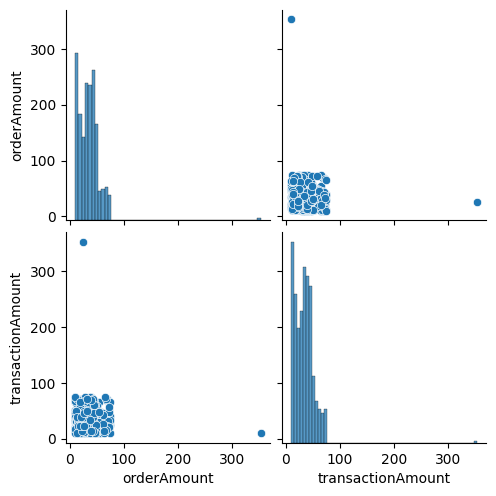

In [22]:
data_aux = data[["orderAmount", "transactionAmount"]].copy()

sns.pairplot(data_aux)

# CORRELACIÓN

## 5) Insights: 

In [27]:
data['orderState']

0        pending
1      fulfilled
2      fulfilled
3      fulfilled
4      fulfilled
         ...    
618          NaN
619          NaN
620          NaN
621          NaN
622          NaN
Name: orderState, Length: 623, dtype: object

In [31]:
data2=pd.get_dummies(data)

status(data2)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderAmount,145,0.232745,0,0.000000,67,float64
1,transactionAmount,0,0.000000,0,0.000000,67,int64
2,transactionFailed,0,0.000000,455,0.730337,2,bool
3,orderState_failed,0,0.000000,573,0.919743,2,bool
4,orderState_fulfilled,0,0.000000,223,0.357945,2,bool
5,orderState_pending,0,0.000000,595,0.955056,2,bool
6,paymentMethodRegistrationFailure_False,0,0.000000,321,0.515249,2,bool
7,paymentMethodRegistrationFailure_True,0,0.000000,583,0.935795,2,bool
8,paymentMethodType_apple pay,0,0.000000,587,0.942215,2,bool
9,paymentMethodType_bitcoin,0,0.000000,595,0.955056,2,bool


In [33]:
vars_to_drop=status(data2).query("unique<=1")['variable']

data_corr = data2.drop(vars_to_drop, axis=1)

status(data_corr)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderAmount,145,0.232745,0,0.000000,67,float64
1,transactionAmount,0,0.000000,0,0.000000,67,int64
2,transactionFailed,0,0.000000,455,0.730337,2,bool
3,orderState_failed,0,0.000000,573,0.919743,2,bool
4,orderState_fulfilled,0,0.000000,223,0.357945,2,bool
5,orderState_pending,0,0.000000,595,0.955056,2,bool
6,paymentMethodRegistrationFailure_False,0,0.000000,321,0.515249,2,bool
7,paymentMethodRegistrationFailure_True,0,0.000000,583,0.935795,2,bool
8,paymentMethodType_apple pay,0,0.000000,587,0.942215,2,bool
9,paymentMethodType_bitcoin,0,0.000000,595,0.955056,2,bool


<Axes: >

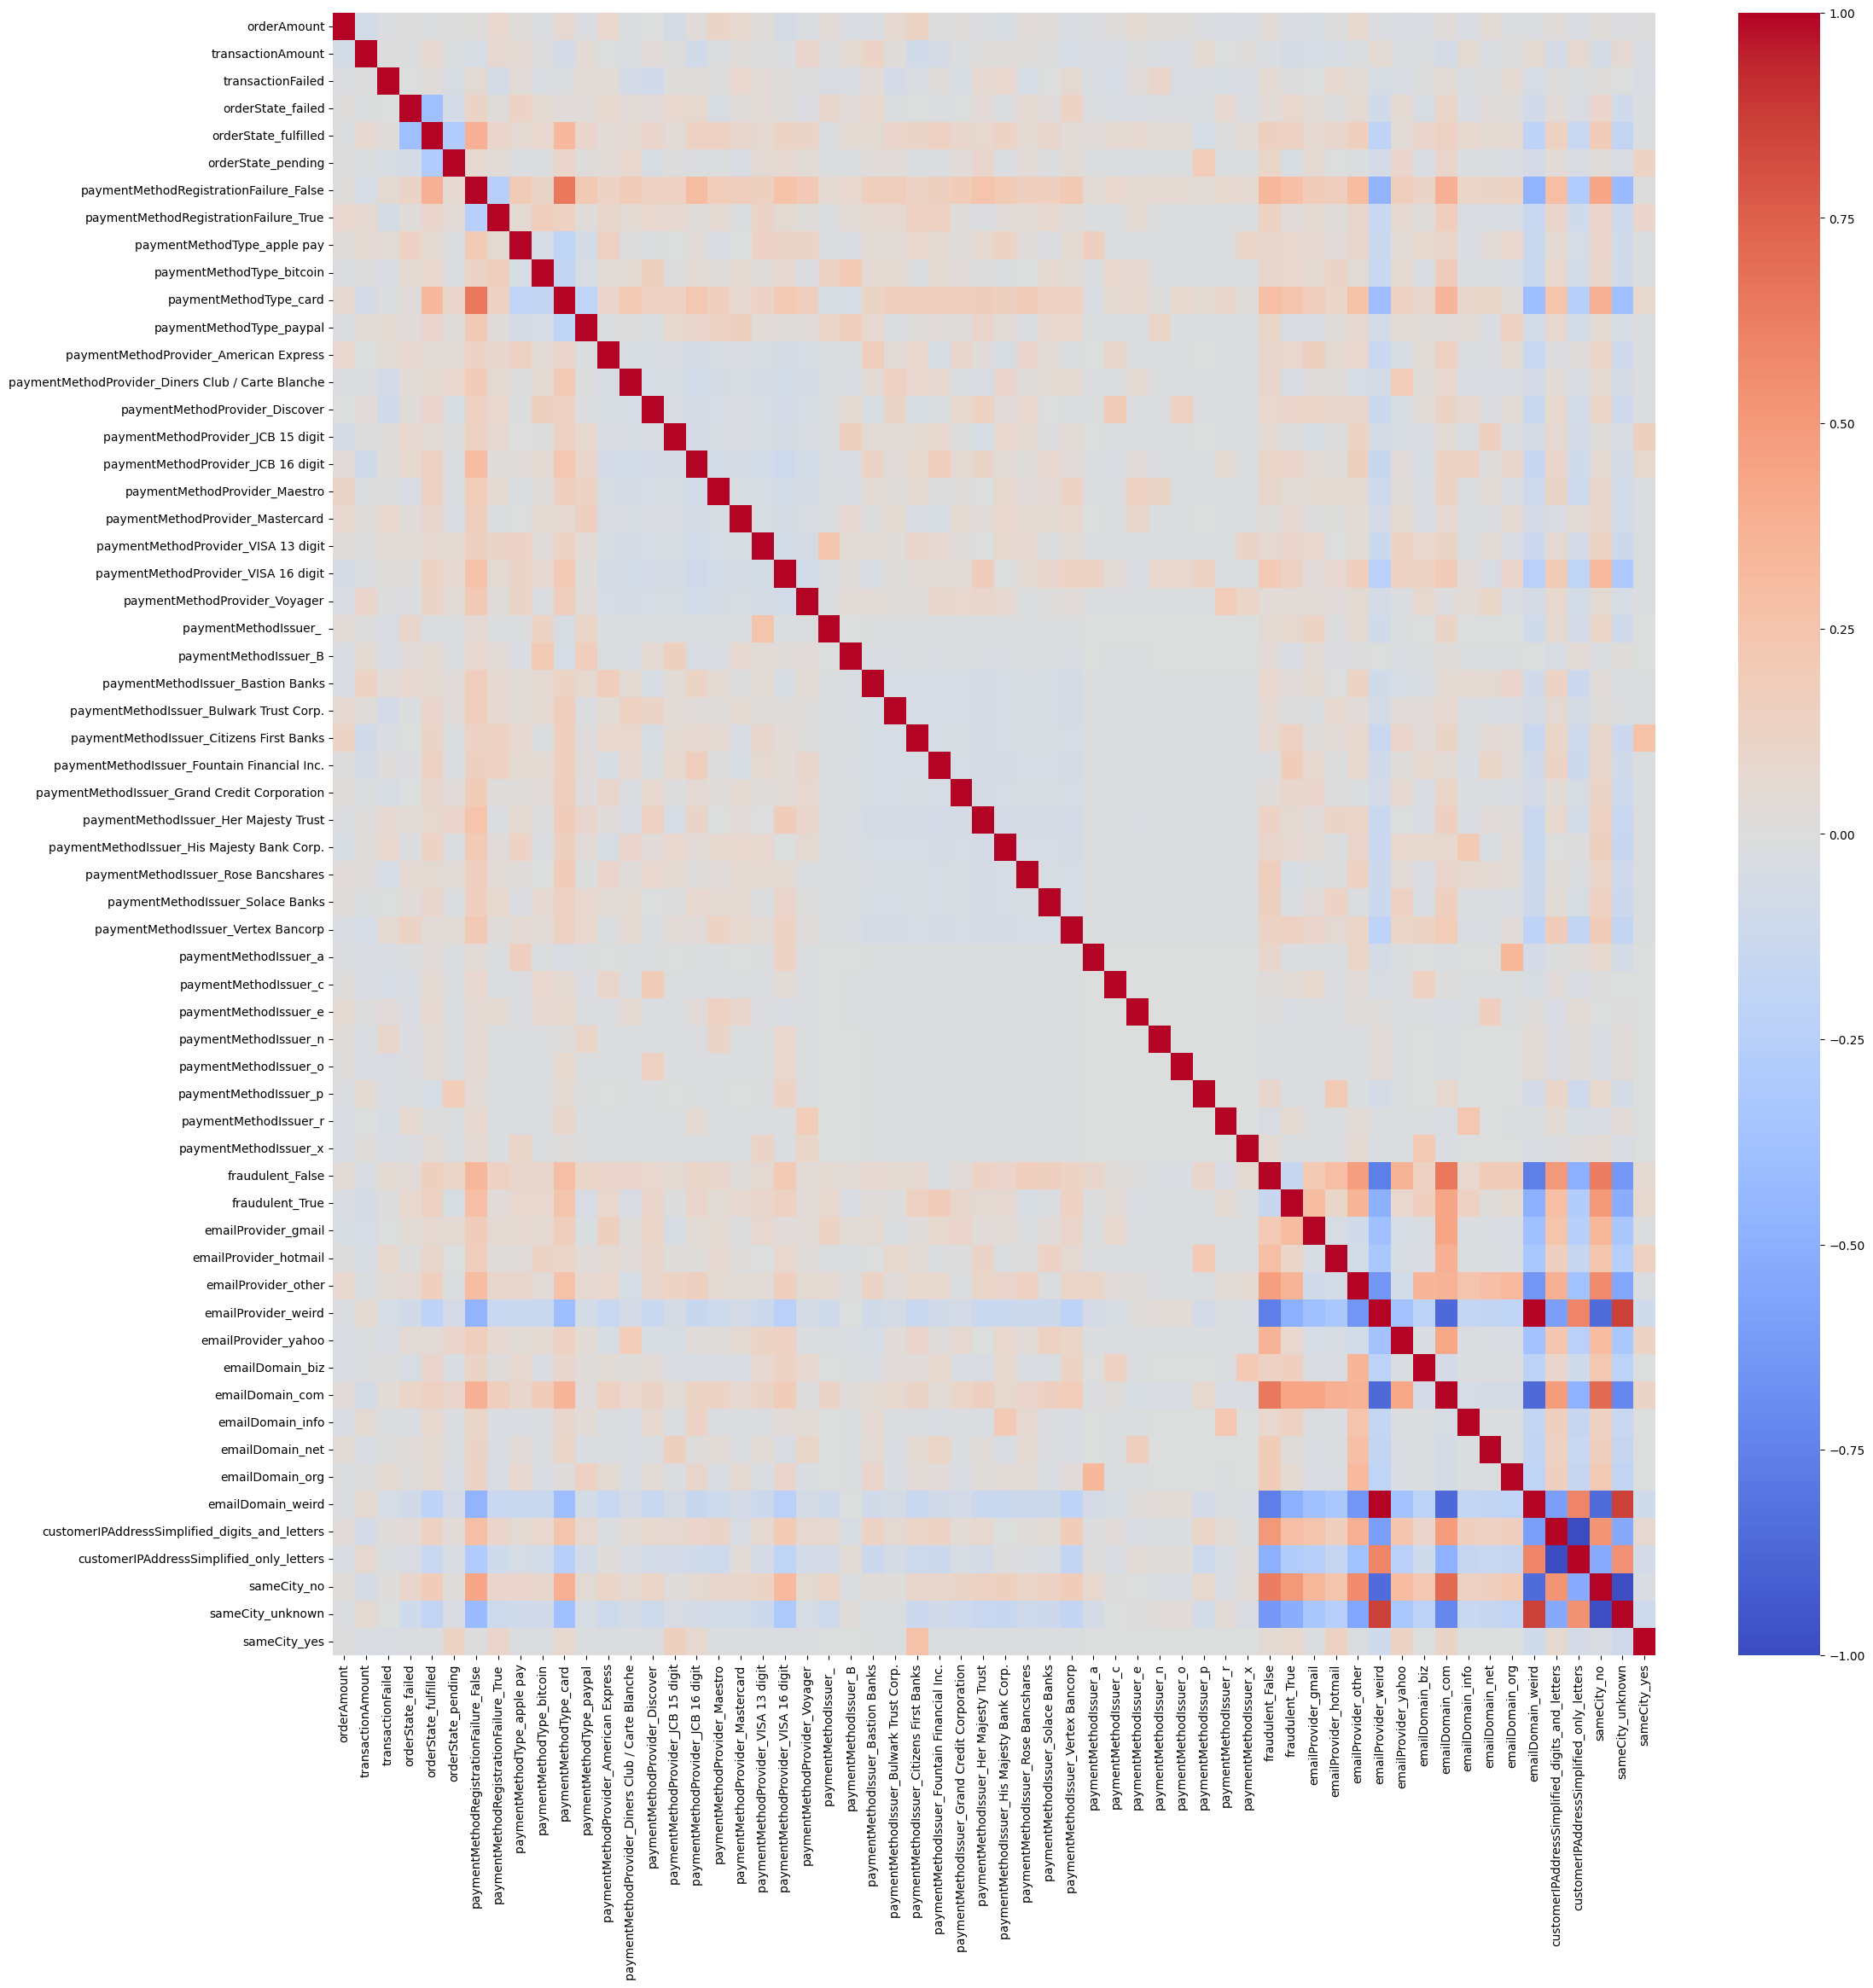

In [36]:
plt.figure(figsize=(25,25))

sns.heatmap(data_corr.corr(), cmap='coolwarm')

## Insights:

1. Se observa una correlación positiva entre 'emailDomain_weird' y 'emailProvider_weird"
2. se observa una correlación negativa entre 'emailProvider_weird' y 'fraudulent_false'
3. Se observa una correlación positiva (no total) entre 'paymentMethodType_card' y 'paymenthMethodRegistrationFailure_False'
4. Se observa una correlación positiva (baja) entre 'sameCity_unknown' y 'emailProvider_weird'
5. En base los insights anteriores notamos que las correlaciones se relacionan de forma positiva y negativa entre variables que contemplen el proveedor y dominio del correo electrónico. Nos atrevemos a inferir que la naturaleza del correo y si coinciden las ciudades puede ser determinante a la hora de descubrir si es el cliente es fraudulento o no. 

# 6) Análisis de correlaciones no lineales basadas en la TDI

Se ha ejecutado este notebook actual en google drive debido a la incompatibilidad de la libreria MINEPY.

Para visualizar la ejecución, vivistar el siguiente enlace:

https://drive.google.com/drive/folders/105CNXVGFeFmLGCwEorToo0LqthcSLUN_

Se obtuvo el siguiente valor: 0.061135409260562004

Un valor de 0.0611 para el MIC (Maximum Information Coefficient) indica que la relación entre transactionAmount y transactionFailed es muy débil. En otras palabras, parece que no hay una dependencia significativa entre el monto de la transacción y el hecho de que esta falle o no.